# IBM HR Attrition and Performance Dataset





### Research Question: Is it possible to accurately predict if an individual will leave a company based on certain conditions in their role and personal life?


Dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 14
from matplotlib.colors import ListedColormap
plt.style.use('fivethirtyeight')

### Import Packages for models

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample

from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import cluster, datasets, preprocessing, metrics


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn import svm
from sklearn import tree

from sklearn.datasets.samples_generator import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

from keras.optimizers import SGD, Adam


Using TensorFlow backend.


### Read in Data

In [3]:
df = pd.read_csv('HR_Data.csv')

### Review the head of my data frame

In [4]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Review the tail of my dataframe

In [5]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Examine the shape of the data frame

In [6]:
df.shape

(1470, 35)

### Examine all numeric columns

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Examine the row index

In [8]:
df.index    

RangeIndex(start=0, stop=1470, step=1)

In [9]:
#Examine the data types for each of the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
#Review all the columns in the Data Frame
df.columns   

Index([u'Age', u'Attrition', u'BusinessTravel', u'DailyRate', u'Department',
       u'DistanceFromHome', u'Education', u'EducationField', u'EmployeeCount',
       u'EmployeeNumber', u'EnvironmentSatisfaction', u'Gender', u'HourlyRate',
       u'JobInvolvement', u'JobLevel', u'JobRole', u'JobSatisfaction',
       u'MaritalStatus', u'MonthlyIncome', u'MonthlyRate',
       u'NumCompaniesWorked', u'Over18', u'OverTime', u'PercentSalaryHike',
       u'PerformanceRating', u'RelationshipSatisfaction', u'StandardHours',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager'],
      dtype='object')

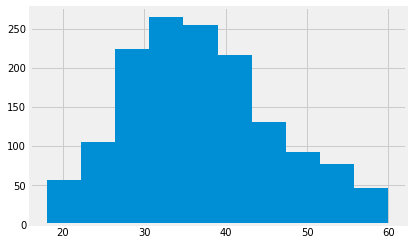

In [11]:
#Created a visualization of "age" with the bins limited to 10
df.Age.hist(bins=10);

In [12]:
#Counted the values of each gender
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [13]:
#Checked to see if there were any null values in the Gender column
df.isnull().sum()         

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
#Examine all object columns 
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [15]:
#Examine all columns, including non-numeric
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [16]:
#Examine an individual column
df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

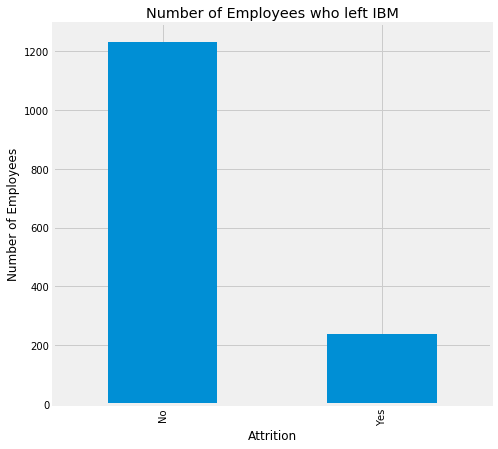

In [17]:
#View the number of Employees who left and stayed at IBM
df.Attrition.value_counts().sort_index().plot(kind='bar', figsize=(7,7));     # bigger plot by increasing age
plt.xlabel('Attrition');
plt.ylabel('Number of Employees');
plt.title('Number of Employees who left IBM');

In [18]:
#Examine how many people older than 40 years travel
df[df.Age < 40].BusinessTravel.value_counts()

Travel_Rarely        665
Travel_Frequently    186
Non-Travel            97
Name: BusinessTravel, dtype: int64

In [19]:
#Examine how many people 40 years or younger travel
df[df.Age >= 40].BusinessTravel.value_counts()

Travel_Rarely        378
Travel_Frequently     91
Non-Travel            53
Name: BusinessTravel, dtype: int64

In [20]:
df[(df.Age < 40) & (df.Department=='Sales')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
37,35,No,Travel_Rarely,890,Sales,2,3,Marketing,1,49,...,1,80,0,2,3,3,2,2,2,2
39,33,No,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,...,1,80,2,10,3,3,5,3,1,3
43,27,No,Travel_Frequently,994,Sales,8,3,Life Sciences,1,56,...,4,80,0,9,0,3,9,8,1,7
46,34,No,Non-Travel,1065,Sales,23,4,Marketing,1,60,...,3,80,0,10,2,3,9,5,8,7
54,26,No,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,...,3,80,1,5,2,2,2,2,0,0
56,35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,1,74,...,4,80,1,9,3,2,9,8,1,8
76,35,No,Travel_Rarely,776,Sales,1,4,Marketing,1,100,...,2,80,0,16,2,3,15,13,2,8
86,23,No,Travel_Rarely,541,Sales,2,1,Technical Degree,1,113,...,3,80,1,3,3,3,0,0,0,0


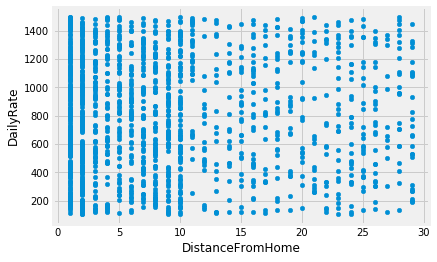

In [21]:
#Examined distance from home compared to daily rate.

df.plot(kind='scatter', x='DistanceFromHome', y='DailyRate')

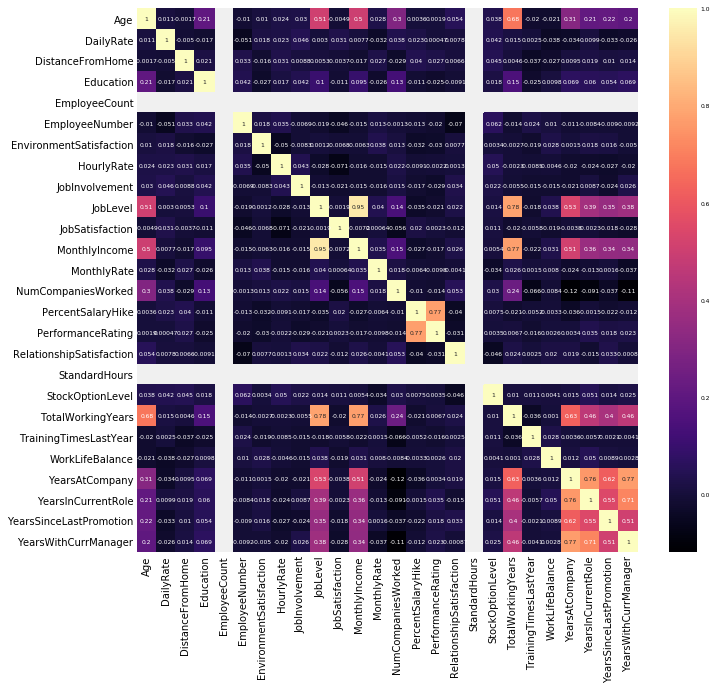

In [22]:
#df.corr()
# I see an interesting correlation between years at the company and years with current manager, 
#pay and current manager. 
# Created a visualization to view the data.

fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams['font.size'] = 6
heatmap = sns.heatmap(df.corr(), annot = True, cmap="magma")
heatmap = heatmap.get_figure()
heatmap.savefig("heatmap.png")

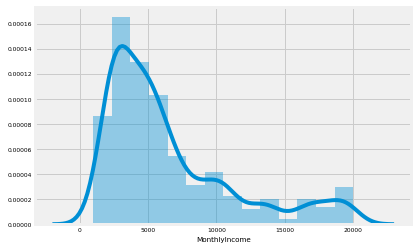

In [23]:
#View Monthly Income on a distribution plot
sns.distplot(df.MonthlyIncome, bins = "scott")



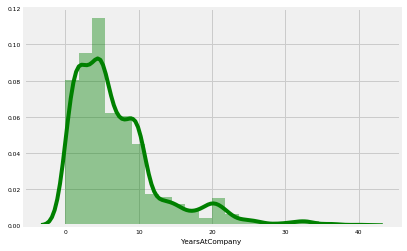

In [24]:
sns.distplot(df.YearsAtCompany, color = 'Green', bins = "scott")

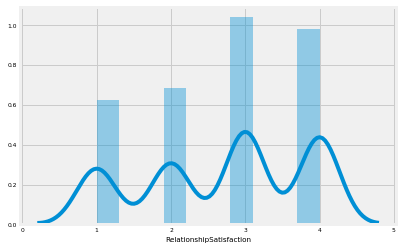

In [25]:
sns.distplot(df.RelationshipSatisfaction, bins = "scott")

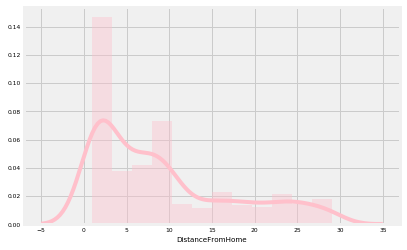

In [26]:
sns.distplot(df.DistanceFromHome, color = 'Pink', bins = "scott")

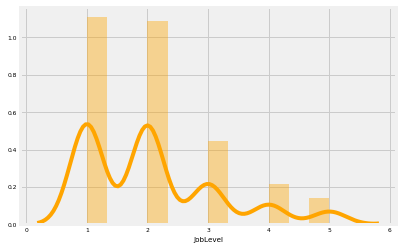

In [27]:
sns.distplot(df.JobLevel, color = 'Orange', bins = "scott")

In [28]:
#Created a new column to change attrition to an integer
df['LeftCompany'] = df.Attrition.map({'No':0, 'Yes':1})

In [29]:
#Double checked to make sure the column came in correctly. 
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeftCompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


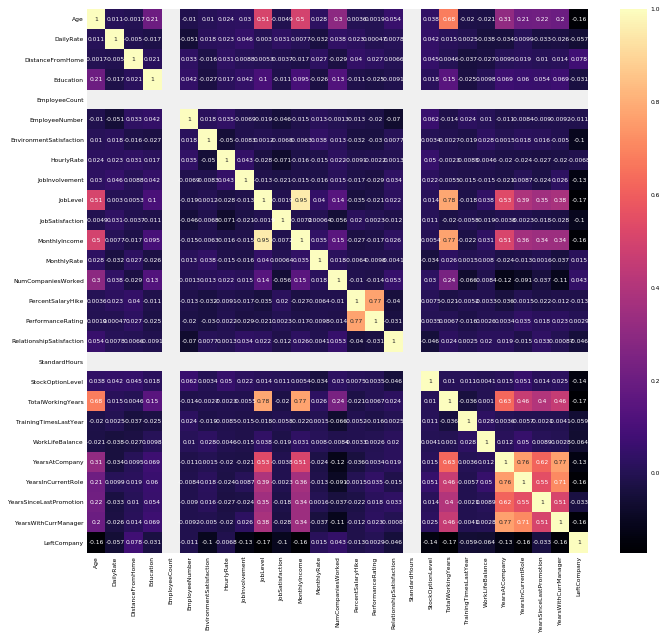

In [30]:
#Create a new correlation matrix

fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams['font.size'] = 6
heatmap = sns.heatmap(df.corr(), annot = True, cmap="magma")
heatmap = heatmap.get_figure()
heatmap.savefig("heatmap.png")


In [31]:
#Determine if there are any high correlations with our target variable
df.corr().LeftCompany.sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
LeftCompany                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [32]:
#So far there are no correlations that are related to attrition. Will have to explore more to determine factors that
#might influence this and create a model. 

In [33]:
#converted Gender and BusinessTravel Column to integers
df['Sex'] = df.Gender.map({'Male':0, 'Female':1})
df['Travel'] = df.BusinessTravel.map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

In [34]:
attrition_df=df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18', 'EducationField', 'HourlyRate','DailyRate', 'StockOptionLevel',  'JobRole', 'MaritalStatus', 'Department', 'OverTime' ,'BusinessTravel', 'Gender','Attrition'], axis=1) 


In [35]:
#Examine the correlations in the new data frame. 
attrition_df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeftCompany,Sex,Travel
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,...,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,0.036311,-0.011807
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,...,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,0.001851,-0.009696
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,...,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,0.016547,-0.008670
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,...,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,-0.000508,-0.011310
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,...,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016,-0.017960,0.029300
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,...,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105,0.039403,-0.011696
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,...,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481,-0.033252,0.008666
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,...,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840,0.031858,-0.013450
MonthlyRate,0.028051,0.027473,-0.026084,0.037600,-0.016322,0.039563,0.000644,0.034814,1.000000,0.017521,...,0.026442,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746,0.015170,0.041482,-0.008440
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,0.017521,1.000000,...,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319,0.043494,0.039147,-0.030743


In [36]:
attrition_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeftCompany,Sex,Travel
0,41,1,2,2,3,2,4,5993,19479,8,...,8,0,1,6,4,0,5,1,1,1
1,49,8,1,3,2,2,2,5130,24907,1,...,10,3,3,10,7,1,7,0,0,2
2,37,2,2,4,2,1,3,2090,2396,6,...,7,3,3,0,0,0,0,1,0,1
3,33,3,4,4,3,1,3,2909,23159,1,...,8,3,3,8,7,3,0,0,1,2
4,27,2,1,1,3,1,2,3468,16632,9,...,6,3,3,2,2,2,2,0,0,1


In [37]:
# wanted to look at the other columns and the possible conversion I could make, to explore further
attrition_df.dtypes

Age                         int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
LeftCompany                 int64
Sex                         int64
Travel                      int64
dtype: object

# Created a smaller data frame, with just three columns to explore other relationships in a smaller dataframe

In [38]:
df3=df[['Age','Attrition', 'PerformanceRating']]

In [39]:
df3.head(5)

,Age,Attrition,PerformanceRating
0,41,Yes,3
1,49,No,4
2,37,Yes,3
3,33,No,3
4,27,No,3


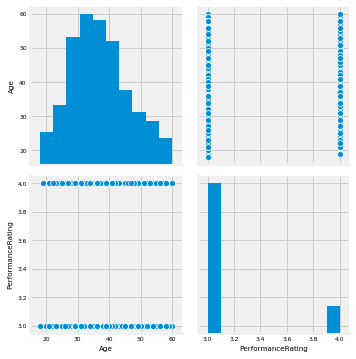

In [40]:
#created a pairplot to visualize the data frame
sns.pairplot(df3);

In [41]:
#Create a random sample of the data
df4 = df3.sample(n=100)
print(df4)

      Age Attrition  PerformanceRating
529    38        No                  3
316    49        No                  3
668    28        No                  3
1052   30        No                  3
634    25        No                  3
476    24        No                  4
586    24        No                  3
206    22        No                  3
1431   32        No                  3
1305   54        No                  3
1060   24       Yes                  3
1121   36        No                  3
1039   34       Yes                  3
1134   35        No                  3
480    30       Yes                  3
1313   29       Yes                  3
1268   53        No                  4
563    25        No                  4
1409   40        No                  3
141    45        No                  3
1357   42        No                  3
1406   54        No                  3
508    35        No                  3
1372   39        No                  4
1006   49       Yes      

In [42]:
df4.corr()

,Age,PerformanceRating
Age,1.00000,-0.05678
PerformanceRating,-0.05678,1.00000


In [43]:
df4.var()

Age                  82.943333
PerformanceRating     0.106667
dtype: float64

In [44]:
df4.cov()

,Age,PerformanceRating
Age,82.943333,-0.168889
PerformanceRating,-0.168889,0.106667


In [45]:
u, p = stats.mannwhitneyu(df4["Attrition"], df4["PerformanceRating"])

In [46]:
print(u)
print(p)

0.0
2.4764511608066025e-41


From what I can see from this EDA, there is a skew in the Attrition variable. Meaning that we would need to treat variable in order to use it as my targeted variable. In order to do this, I will have to over sample the data. I did check and know that there are no null values in the data that I will have to treat. My next step is to determinet the variables I will use, and start engineering my data. 


# Feature Selection and Engineering 

After completing an inital EDA, I determined what variables I would like to explore. 


In [47]:
#Checked the columns of my dataframe
attrition_df.head(3)

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeftCompany,Sex,Travel
0,41,1,2,2,3,2,4,5993,19479,8,...,8,0,1,6,4,0,5,1,1,1
1,49,8,1,3,2,2,2,5130,24907,1,...,10,3,3,10,7,1,7,0,0,2
2,37,2,2,4,2,1,3,2090,2396,6,...,7,3,3,0,0,0,0,1,0,1


In [48]:
#Reviewed the shape again
attrition_df.shape

(1470, 23)

In [49]:
# Predict the mean of the entire data set.
attrition_df['Prediction'] = attrition_df.LeftCompany.mean()
attrition_df.head(2)

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeftCompany,Sex,Travel,Prediction
0,41,1,2,2,3,2,4,5993,19479,8,...,0,1,6,4,0,5,1,1,1,0.161224
1,49,8,1,3,2,2,2,5130,24907,1,...,3,3,10,7,1,7,0,0,2,0.161224


In [50]:
# Calculate RMSE for those predictions.

np.sqrt(metrics.mean_squared_error(attrition_df.LeftCompany, attrition_df.Prediction))

0.367737887204955

In [51]:
#Calculate a baseline
baseline=np.zeros(1470)
print(accuracy_score(baseline,attrition_df.LeftCompany))

0.8387755102040816


In [52]:
#Select my feature columns
Features = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Sex', 'Travel']
X = attrition_df[Features]
y = attrition_df[['LeftCompany']]

In [53]:
#Concatenate the dateframe back together
df = pd.concat([y, X], axis=1)

In [54]:
#Print a list of the columns
for col in df.columns: 
    print(col)

LeftCompany
Age
DistanceFromHome
Education
EnvironmentSatisfaction
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Sex
Travel


In [55]:
#Scale my data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/anaconda3/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
#Define my features again with the scaled data
Features = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Sex', 'Travel']
X_scaled = pd.DataFrame(X_scaled, columns = Features)

In [57]:
#Concatenate the scaled data
scaled_df = pd.concat([y, X_scaled], ignore_index=True)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [58]:
#Use SMOTE to over sample my data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12, ratio = 1.0)
X_S, y_S = smote.fit_sample(X_scaled, y.values.ravel())

In [59]:
#Define the feature columns again
X_S = pd.DataFrame(X_S, columns = Features)
y_S = pd.DataFrame(y_S, columns = ['LeftCompany'])
df_smote = pd.concat([y_S, X_S], axis=1)

In [60]:
#Check to make sure there is equal amounts of counts for each condition for our target variable
df_smote.LeftCompany.value_counts()

1    1233
0    1233
Name: LeftCompany, dtype: int64

In [61]:
#Create a baseline with the new dataframe

In [62]:
y_S.LeftCompany.value_counts(normalize = True) * 100

1    50.0
0    50.0
Name: LeftCompany, dtype: float64

In [63]:
#Create train and test datasets

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_S, y_S, test_size=0.2, random_state=100)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1972, 21)
(494, 21)
(1972, 1)
(494, 1)


In [66]:
#Defined my models and used default settings

In [67]:
pipe_log = Pipeline([('scl', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
    ('clf', svm.SVC(random_state=42))])

pipe_DT = Pipeline([('scl', StandardScaler()),
    ('clf', tree.DecisionTreeClassifier(random_state=42))])

pipe_rdf = Pipeline([('scl', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))])

pipe_GBC=Pipeline([('scl', StandardScaler()),
    ('clf',GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01))])


In [68]:
# List of pipelines in order to iterate
pipelines = [pipe_log, pipe_svm, pipe_DT, pipe_rdf, pipe_GBC]

# Create a dictionary of models
pipe_dict = {0: "Logistic Regression", 1: 'Support Vector Machine', 2: 'Decision Tree', 3: 'Random Forest', 4: 'Gradient Boosting'}
# Fit the pipelines

for pipe in pipelines:
        pipe.fit(X_train[Features], y_train['LeftCompany'])

# Compare accuracies
for idx, val in enumerate(pipelines):
        print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test[Features], y_test['LeftCompany'])))

# Find the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
        if val.score(X_test, y_test['LeftCompany']) > best_acc:
            best_acc = val.score(X_test, y_test['LeftCompany'])
            best_pipe = val
            best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])




/anaconda3/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression pipeline test accuracy: 0.7348
Support Vector Machine pipeline test accuracy: 0.8826
Decision Tree pipeline test accuracy: 0.8583
Random Forest pipeline test accuracy: 0.9109
Gradient Boosting pipeline test accuracy: 0.9271
Classifier with best accuracy: Gradient Boosting


In [69]:
#Metrics Classification report

for idx, val in enumerate(pipelines):
    print(pipe_dict[idx])
    print(classification_report(y_test, val.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       247
           1       0.74      0.73      0.73       247

   micro avg       0.73      0.73      0.73       494
   macro avg       0.73      0.73      0.73       494
weighted avg       0.73      0.73      0.73       494

Support Vector Machine
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.86      0.91      0.89       247

   micro avg       0.88      0.88      0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       247
           1       0.86      0.85      0.86       247

   micro avg       0.86      0.86      0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg     

In [70]:
#Create a dictionary of AUROC
AUROC_dict = {'Logistic Reqression': roc_auc_score(y_test, pipe_log.predict(X_test))}
AUROC_dict['Support Vector Machine'] = roc_auc_score(y_test, pipe_svm.predict(X_test))
AUROC_dict['Decision Tree'] = roc_auc_score(y_test, pipe_DT.predict(X_test))
AUROC_dict['Random Forest'] = roc_auc_score(y_test, pipe_rdf.predict(X_test))
AUROC_dict['Gradient Boosting'] = roc_auc_score(y_test, pipe_GBC.predict(X_test))


In [71]:
AUROC = pd.DataFrame(pd.Series(AUROC_dict, index=AUROC_dict.keys(), name='AUROC Score'))

In [72]:
AUROC.sort_values('AUROC Score',inplace=True)

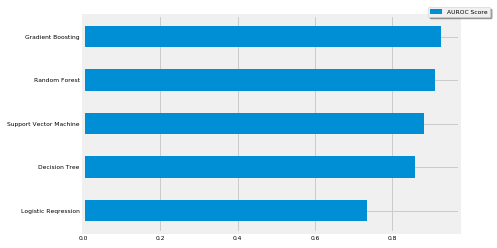

In [73]:
#Plot the AUROC scores for each of the models
a2 = AUROC.plot.barh(y='AUROC Score')
a2.legend(loc='upper center', bbox_to_anchor=(1, 1.05),
          ncol=5, fancybox=True, shadow=True)

In [76]:
#Create new X and y 
X = df_smote[Features]
y = df_smote[['LeftCompany']]

In [77]:
#Create Train and test set for Neural Net

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [79]:
#instantiate the model and specify the hidden layers
model=Sequential()
model.add(Dense(input_dim=21,units=8,activation='relu'))
model.add(Dense(units=18,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [80]:
#Compile the model with the Adam optimizer
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
#Review the summary and hidden layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 176       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                162       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 19        
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [82]:
#Fit the model
Fitting=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1972 samples, validate on 494 samples
Epoch 1/10
1972/1972 [==============================] - 0s 182us/step - loss: 0.6273 - acc: 0.6435 - val_loss: 0.5474 - val_acc: 0.7166
Epoch 2/10
1972/1972 [==============================] - 0s 52us/step - loss: 0.5335 - acc: 0.7181 - val_loss: 0.4971 - val_acc: 0.7611
Epoch 3/10
1972/1972 [==============================] - 0s 48us/step - loss: 0.4964 - acc: 0.7566 - val_loss: 0.4934 - val_acc: 0.7672
Epoch 4/10
1972/1972 [==============================] - 0s 58us/step - loss: 0.4764 - acc: 0.7703 - val_loss: 0.4856 - val_acc: 0.7611
Epoch 5/10
1972/1972 [==============================] - 0s 64us/step - loss: 0.4567 - acc: 0.7840 - val_loss: 0.4859 - val_acc: 0.7632
Epoch 6/10
1972/1972 [==============================] - 0s 46us/step - loss: 0.4330 - acc: 0.8109 - val_loss: 0.4812 - val_acc: 0.7692
Epoch 7/10
1972/1972 [==============================] - 0s 60us/step - loss: 0.4214 - acc: 0.8